# Signature
This was done as part of the WEL project. 

On that project I was using the `TurbulenceProfilerClass`

`from turbo_tools.classes.adcp_object import TurbulenceProfilerClass`

This is initialised as:

`tpo = TurbulenceProfilerClass(ds.time.values, ds.distance.values, ds.Eastvel_Nortek.values.transpose(), ds.Northvel_Nortek.values.transpose(), ds.Upvel_Nortek.values.transpose(), ds.beam5amp.values.transpose(), fs=4)`

The ds there was produced by:
1. Signature software export to mat [many small files]
1. Matlab convert all of the signature files to nc
2. Read the nc s in xarray

I need something with fewer steps. Kilcher's Dolfyn may be the solution here. 



In [1]:
import xarray as xr
from turbo_tools.utils import time as turbo_utils_time
import matplotlib.pyplot as plt

import importlib
import datetime
import turbo_tools
import numpy as np
import dolfyn as dlfn

from os import listdir
import os

from zutils.time import num2date_lk as num2date_lk
from zutils.xr import xrwrap

# from pIMOS.utils.nortek_signature_utils import beam2inst, inst2earth

from turbo_tools.classes.adcp_object import TurbulenceProfilerClass

from pIMOS.xrwrap.NORTEK_SIGNATURE import NORTEK_SIGNATURE


<class 'datetime.datetime'>
Module tested
<class 'datetime.datetime'>
Time vector is well spaced
<class 'numpy.datetime64'>
Time vector is well spaced
There are 101 elements in this 10 second period spaced at 0.1.
Time Module OK


c:\users\azulberti\dropbox\university\phd\03_code\source_code\turbo_tools\turbo_tools\utils\time.py:182: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  ans = linspacetime(pd.datetime.today(), pd.datetime.today()+datetime.timedelta(1), n=100)
c:\users\azulberti\dropbox\university\phd\03_code\source_code\turbo_tools\turbo_tools\utils\time.py:189: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  ans = linspacetime(pd.datetime.today(), pd.datetime.today()+dt, dt_s=dt_s)


Time vector is well spaced
Time vector is well spaced
There are 101 elements in this 10 second period spaced at 0.1.
Time Module OK
[[ 6.123234e-17 -1.000000e+00  0.000000e+00]
 [ 1.000000e+00  6.123234e-17  0.000000e+00]
 [ 0.000000e+00  0.000000e+00  1.000000e+00]]


c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\time.py:217: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  ans = linspacetime(pd.datetime.today(), pd.datetime.today()+datetime.timedelta(1), n=100)
c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\time.py:224: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  ans = linspacetime(pd.datetime.today(), pd.datetime.today()+dt, dt_s=dt_s)


In [2]:
nens = 100000000
print_nens_lims = True

drive = 'G'
# drive = 'E'
fullpath = drive + r':\Experiments\kissme17\sp250l\signature1000\S100460A008_KISSME_CB.ad2cp'

hasb = 0.35;

# Deployment
start = 24*30000
end   = 40*30000

# Apr-2 wave
start = 50*30000
end   = 55*30000

# Apr-3 wave
start = 50*30000+700000
end   = 55*30000+750000

nens=[start, end]


In [3]:

signature = NORTEK_SIGNATURE(fullpath, dat=None, nens=nens, hasb=hasb)


c:\users\azulberti\dropbox\university\phd\03_code\source_code\dolfyn\dolfyn\io\nortek.py:179: UserWarning: a 'start ensemble' is not yet supported for the Nortek reader. This function will read the entire file, then crop the beginning at nens[0].
  warnings.warn("a 'start ensemble' is not yet supported "


Im a string
dolfyn
Reading 2 ensembles [2200000-2200002] from file  %s ...
Reading 2 ensembles [2400000-2400002] from file  %s ...
Ensemble range spans 2017-04-03 05:23:20.063301 to 2017-04-03 12:20:00.063296
     6.944444443099201 hours in record.
Reading 200000 ensembles [2200000-2400000] from file  %s ...
File read, 6.944409778341651 hours in record.
Converting mpltime to date. Expect delays!
Converted.
     Starts: 2017-04-03 05:23:20.063301
     Ends: 2017-04-03 12:19:59.902900
     How were those delays?
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
Updating attributes function of the class.
Setting attribute "title" to "Measured data from a TDRI ADCP read from .PD0 files"
Setting attribute "institution" to "UWA"
Setting attribute "source" to "TDRI ADCP [Workhorse, Quartermaster, or Longranger]

# Calculation if 'height' variable
This needs to recalculated more consistently across the ADCPs 


# Show the Transformation Matrix

In [7]:
signature.T
signature._calc_rotations()

Done.


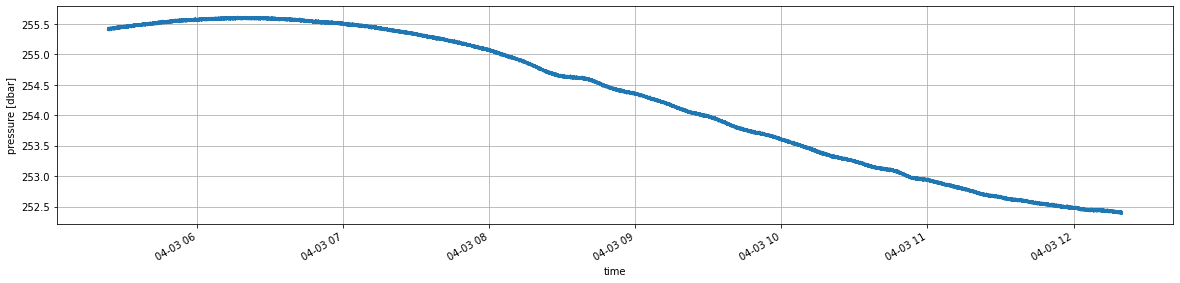

In [12]:
plt.figure(figsize=(20, 4))
signature.ds.pressure.plot()
# plt.xlim([signature.ds.time[0], signature.ds.time[-1]])
plt.grid()

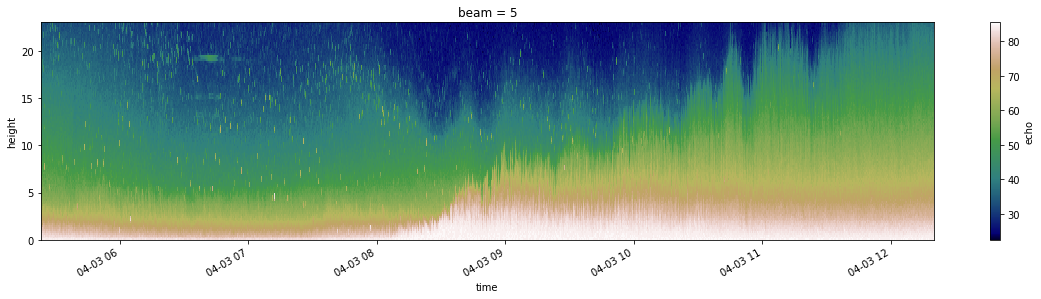

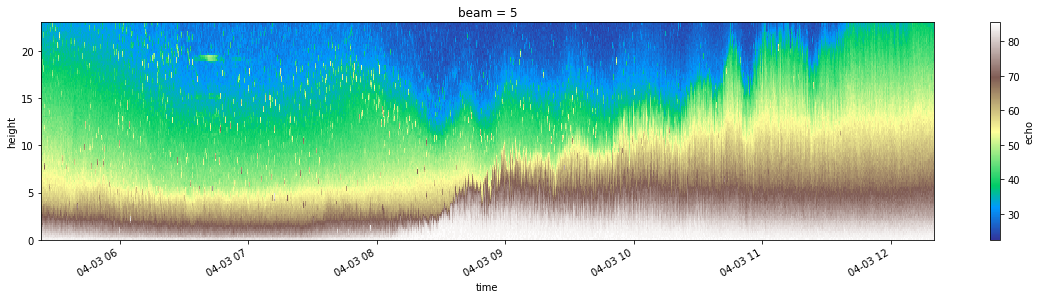

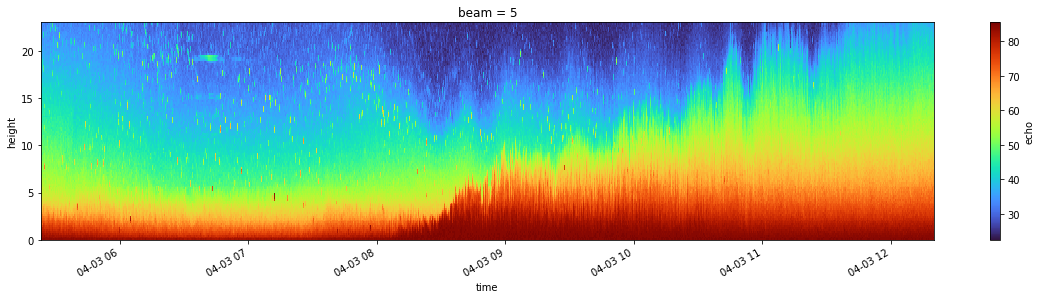

In [13]:
plt.figure(figsize=(20, 4))
signature.ds.echo[4, :, :].plot(cmap='gist_earth')
plt.show()

plt.figure(figsize=(20, 4))
signature.ds.echo[4, :, :].plot(cmap='terrain')
plt.show()

plt.figure(figsize=(20, 4))
signature.ds.echo[4, :, :].plot(cmap='turbo')
plt.show()

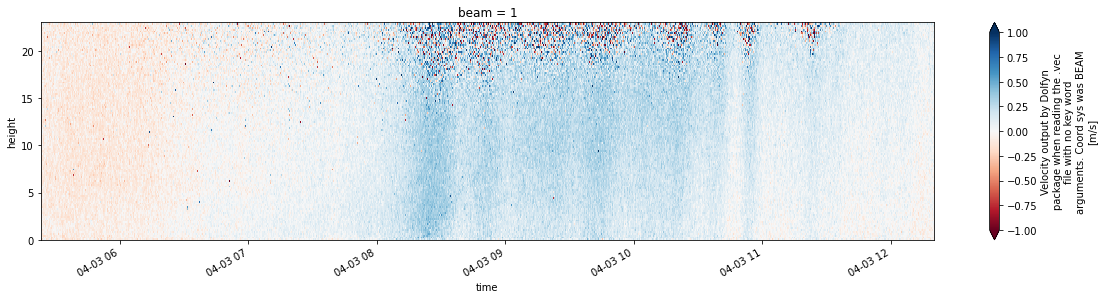

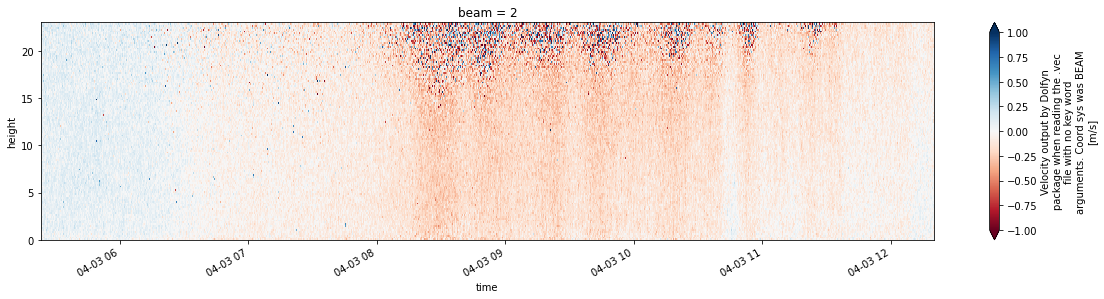

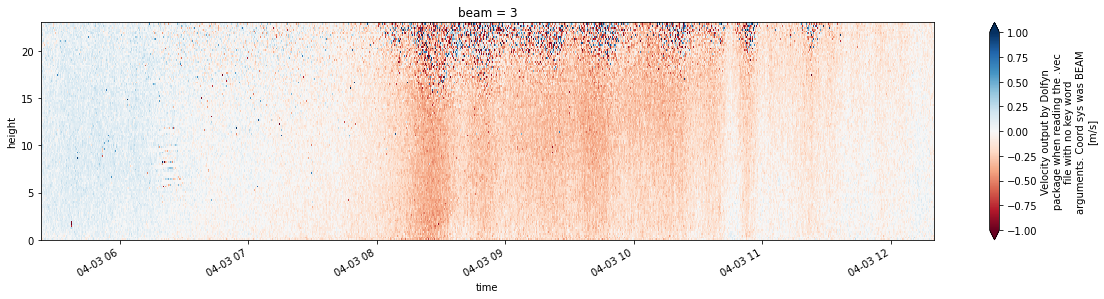

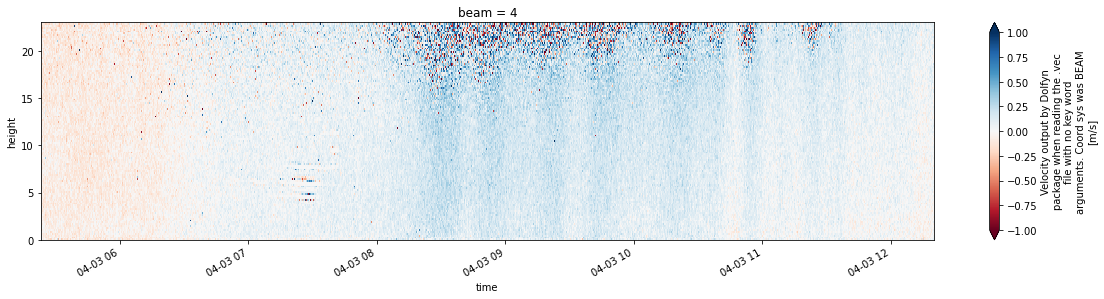

In [14]:

plt.figure(figsize=(20, 4))
signature.ds.vel_dolfyn[0, :, :].plot(vmin=-1, vmax=1, cmap='RdBu')
plt.show()

plt.figure(figsize=(20, 4))
signature.ds.vel_dolfyn[1, :, :].plot(vmin=-1, vmax=1, cmap='RdBu')
plt.show()

plt.figure(figsize=(20, 4))
signature.ds.vel_dolfyn[2, :, :].plot(vmin=-1, vmax=1, cmap='RdBu')
plt.show()

plt.figure(figsize=(20, 4))
signature.ds.vel_dolfyn[3, :, :].plot(vmin=-1, vmax=1, cmap='RdBu')
plt.show()


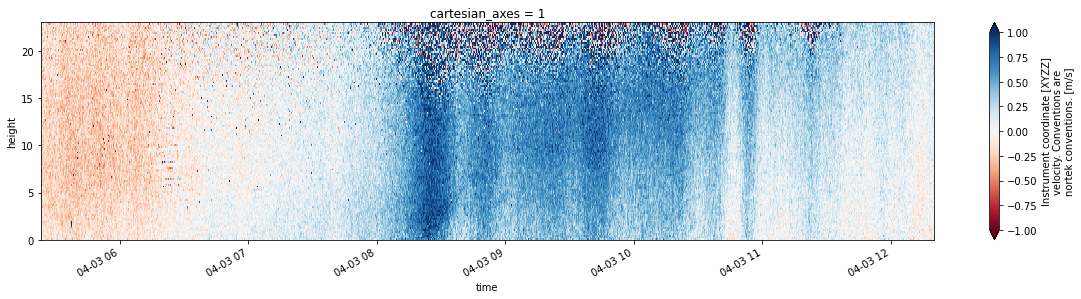

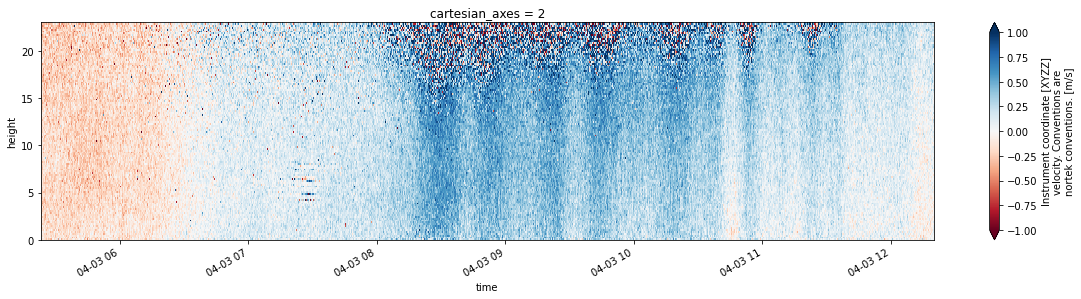

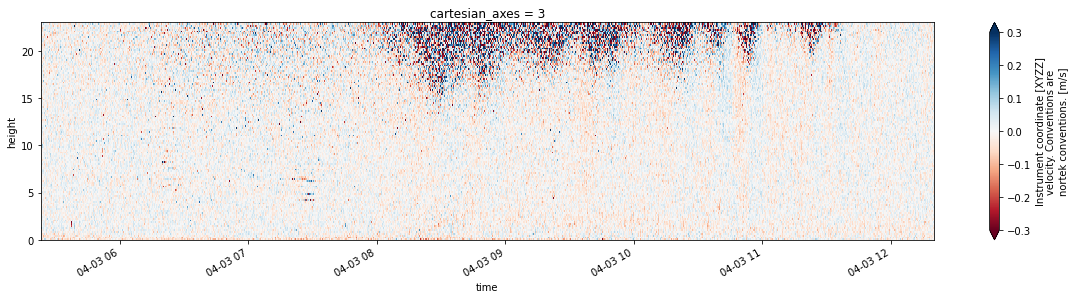

In [15]:

# signature.ds.vel_enu.values = ENU

plt.figure(figsize=(20, 4))
signature.ds.vel_xyz[0, :, :].plot(vmin=-1, vmax=1, cmap='RdBu')
plt.show()

plt.figure(figsize=(20, 4))
signature.ds.vel_xyz[1, :, :].plot(vmin=-1, vmax=1, cmap='RdBu')
plt.show()

plt.figure(figsize=(20, 4))
signature.ds.vel_xyz[2, :, :].plot(vmin=-0.3, vmax=0.3, cmap='RdBu')
plt.show()


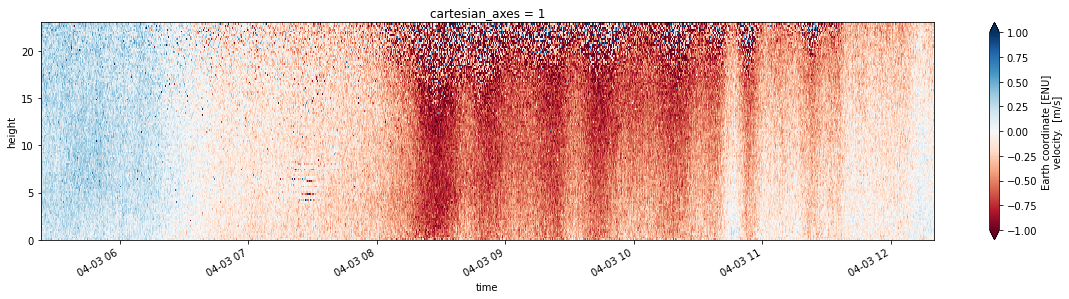

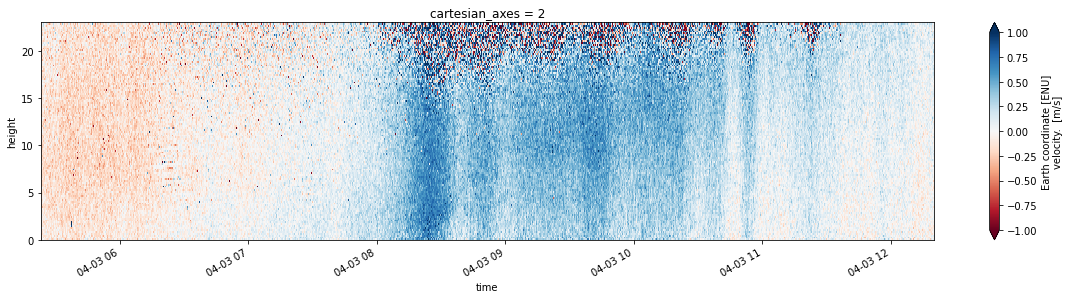

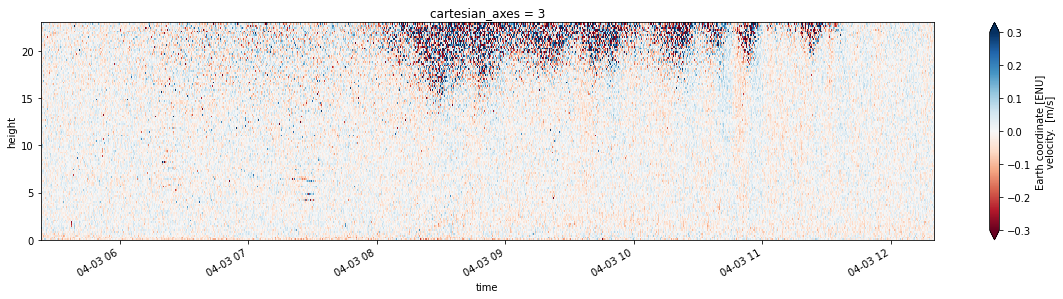

In [16]:
plt.figure(figsize=(20, 4))
signature.ds.vel_enu[0, :, :].plot(vmin=-1, vmax=1, cmap='RdBu')
plt.show()

plt.figure(figsize=(20, 4))
signature.ds.vel_enu[1, :, :].plot(vmin=-1, vmax=1, cmap='RdBu')
plt.show()

plt.figure(figsize=(20, 4))
signature.ds.vel_enu[2, :, :].plot(vmin=-0.3, vmax=0.3, cmap='RdBu')
plt.show()


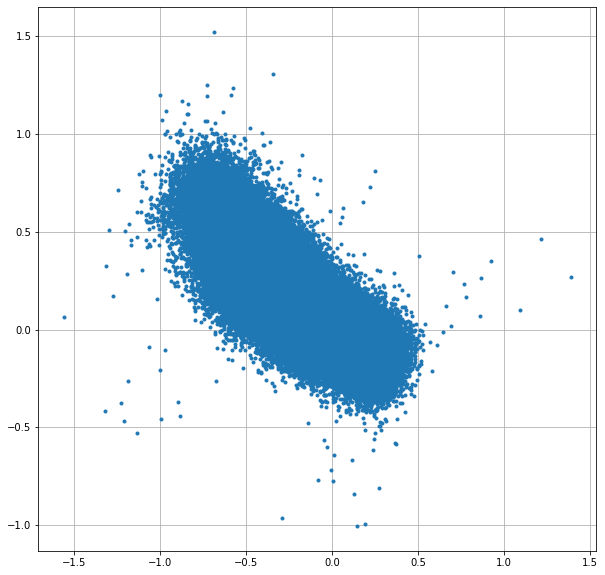

In [17]:
plt.figure(figsize=(10,10))
plt.plot(signature.ds.vel_enu[0, 10, :], signature.ds.vel_enu[1, 10, :], '.')
plt.grid()

# QC

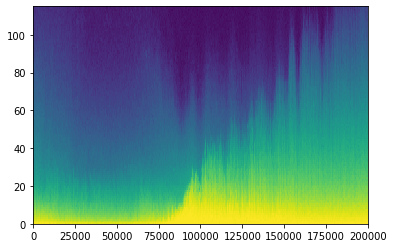

In [24]:
min_echo = np.min(signature.ds.echo, axis=0)
plt.figure(figsize=(10,10))

plt.figure(figsize=(20, 4))
plt.pcolor(min_echo)

<ipython-input-35-7ab20a5bfe7a>:10: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(signature.ds.time, signature.ds.distance, u, vmin=-0.3, vmax=0.3, cmap='RdBu')


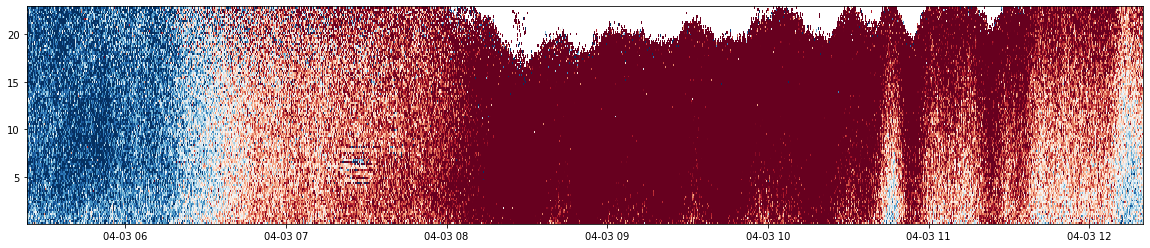

In [35]:
ind = min_echo.values<27

u = signature.ds.vel_enu[0, :, :].values.copy()
u[ind] = np.nan

# plt.figure(figsize=(20, 4))
# plt.pcolor(signature.ds.time, signature.ds.distance, ind)



<ipython-input-36-f7a9f17bc529>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(signature.ds.time, signature.ds.distance, u, vmin=-1, vmax=1, cmap='RdBu')


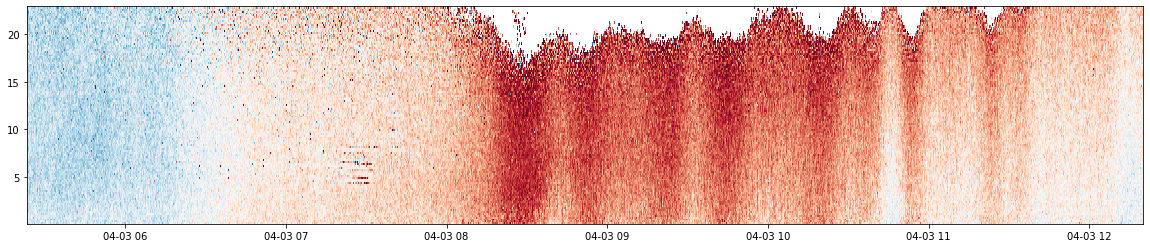

In [36]:
plt.figure(figsize=(20, 4))
plt.pcolor(signature.ds.time, signature.ds.distance, u, vmin=-1, vmax=1, cmap='RdBu')

# Now revisit the ADP object

In [ ]:
from turbo_tools.classes.adcp_object import TurbulenceProfilerClass as TPO

import importlib
importlib.reload(turbo_tools.classes.adcp_object)
from turbo_tools.classes.adcp_object import TurbulenceProfilerClass as TPO


In [ ]:
tpo = TPO(ds.time, ds.height, ds.vel_enu[0, :, :], ds.vel_enu[1, :, :], ds.vel_enu[2, :, :], ds.echo[4, :, :], fs=8)

In [ ]:
tpo.re_avg()
tpo.ds

In [ ]:
plt.figure(figsize=(20, 4))
tpo.ds.mean_vel_e.plot(vmin=-1, vmax=1, cmap='RdBu')
plt.show()

plt.figure(figsize=(20, 4))
tpo.ds.mean_vel_n.plot(vmin=-1, vmax=1, cmap='RdBu')
plt.show()

plt.figure(figsize=(20, 4))
tpo.ds.mean_vel_u.plot(vmin=-0.1, vmax=0.1, cmap='RdBu')
plt.show()


# Need to copy over all of the QC measures from Matlab to Python

1. Phase wrapping [DONE]
1. Goring Nikora [DONE]
1. The fish detection that doesn't get tricked vy turbulent billows at the top of the BBL
1. Threshold based QAQC


In [ ]:
raise()